###### 了解数据
导入模块

In [612]:
import pandas as pd
import matplotlib.pyplot as plt

加载数据

In [613]:
df1 = pd.read_csv('流行电影评分预测1.csv')
df2 = pd.read_csv('流行电影评分预测2.csv')

删除冗余特征

In [614]:
df1.drop(columns=['Unnamed: 0'], inplace=True)
df2.drop(columns=['Unnamed: 0'], inplace=True)

拼接数据

In [615]:
df = pd.merge(df1, df2, on='影片', how='inner')

查看数据样式

In [616]:
df.head()

,影片,类型,简介,导演,主演,年份,时长,评分,票房
0,X-Men: Apocalypse,"Action,Adventure,Sci-Fi",After the re-emergence of the world's first mu...,Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",2016,144min,7.1,155.33
1,Deadpool,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108min,8.0,363.02
2,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107min,5.6,26.84
3,Captain America: Civil War,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147min,7.9,408.08
4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169min,8.6,187.99


查看数据形状，样本数量

In [617]:
df.shape

(1066, 9)

In [618]:
len(df)

1066

查看缺失值大概情况

In [619]:
df.isnull().sum()

影片      0
类型      0
简介      0
导演      0
主演      0
年份      7
时长      0
评分      7
票房    146
dtype: int64

查看数据统计特征

In [620]:
df.describe(include='all')

,影片,类型,简介,导演,主演,年份,时长,评分,票房
count,1066,1066,1066,1066,1066,1059,1066,1059,920.000000
unique,967,206,968,626,964,15,96,56,NaN
top,Nine Lives,Drama,A stuffy businessman finds himself trapped ins...,Paul W.S. Anderson,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,92min,7.1,NaN
freq,4,50,4,9,4,280,33,54,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.753402
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.324979
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.765000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.800000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.630000


###### 数据处理

重复值

In [621]:
df.duplicated().sum()

93

In [622]:
duplicate_rows = df.duplicated()
duplicate_data = df[duplicate_rows]
duplicate_data

,影片,类型,简介,导演,主演,年份,时长,评分,票房
939,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83min,3.5,NaN
940,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83min,3.5,NaN
941,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83min,3.5,NaN
943,The Lone Ranger,"Action,Adventure,Western",Native American warrior Tonto recounts the unt...,Gore Verbinski,"Johnny Depp, Armie Hammer, William Fichtner,To...",2013,150min,6.5,89.29
944,The Lone Ranger,"Action,Adventure,Western",Native American warrior Tonto recounts the unt...,Gore Verbinski,"Johnny Depp, Armie Hammer, William Fichtner,To...",2013,150min,6.5,89.29
...,...,...,...,...,...,...,...,...,...
1057,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,1h38min,6.2,58.01
1060,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93min,5.6,NaN
1061,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,1h23min,5.6,NaN
1064,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87min,5.3,19.64


In [623]:
df.drop_duplicates(keep='first', inplace=True)

In [624]:
df.duplicated().sum()

0

缺失值处理

In [625]:
df.isnull().sum()

影片      0
类型      0
简介      0
导演      0
主演      0
年份      7
时长      0
评分      7
票房    126
dtype: int64

In [626]:
df[df['年份'].isnull()]

,影片,类型,简介,导演,主演,年份,时长,评分,票房
621,Solace,"Crime,Drama,Mystery",A psychic works with the FBI in order to hunt ...,Afonso Poyart,"Anthony Hopkins, Jeffrey Dean Morgan, Abbie Co...",NaN,101min,NaN,NaN
623,Popstar: Never Stop Never Stopping,"Comedy,Music",When it becomes clear that his solo album is a...,Akiva Schaffer,"Andy Samberg, Jorma Taccone,Akiva Schaffer, Sa...",NaN,87min,NaN,9.39
689,Neighbors,Comedy,After they are forced to live next to a frater...,Nicholas Stoller,"Seth Rogen, Rose Byrne, Zac Efron, Lisa Kudrow",NaN,97min,NaN,150.06
763,Ma vie de Courgette,"Animation,Comedy,Drama","After losing his mother, a young boy is sent t...",Claude Barras,"Gaspard Schlatter, Sixtine Murat, Paulin Jacco...",NaN,66min,NaN,0.29
765,No Strings Attached,"Comedy,Romance",A guy and girl try to keep their relationship ...,Ivan Reitman,"Natalie Portman, Ashton Kutcher, Kevin Kline, ...",NaN,108min,NaN,70.63
785,Inside Man,"Crime,Drama,Mystery","A police detective, a bank robber, and a high-...",Spike Lee,"Denzel Washington, Clive Owen, Jodie Foster,Ch...",NaN,129min,NaN,88.50
852,Transcendence,"Drama,Mystery,Romance",A scientist's drive for artificial intelligenc...,Wally Pfister,"Johnny Depp, Rebecca Hall, Morgan Freeman, Cil...",NaN,119min,NaN,23.01


In [627]:
# 清洗年份列，将特殊字符替换为NaN或空字符串
df['年份'] = df['年份'].str.replace(r'\D', '', regex=True).replace('', pd.NA)

# 清洗评分列，将特殊字符替换为NaN或空字符串
df['评分'] = df['评分'].str.replace(r'[^0-9.]+', '', regex=True).replace('', pd.NA)  # ^出现在[]内 表示取反

# 将年份列转换为整数类型
df['年份'] = df['年份'].astype('Int32')

# 填充年份、评分和票房列的缺失值
df['年份'].fillna(df['年份'].median(), inplace=True)
df['评分'].fillna(df['评分'].median(), inplace=True)
df['票房'].fillna(df['票房'].mode()[0], inplace=True)

# 将评分列转换为整数类型
df['评分'] = df['评分'].astype('float')
# df['票房'] = df['票房'].astype('float')


将“时长”统一格式

In [628]:
# 检查时长列是否都是数字+min结尾
is_valid_duration = df['时长'].str.match(r'^\d+min$')

# 打印不符合条件的行
for index in  df[~is_valid_duration].index:
    # 提取时长中的小时和分钟信息
    duration_hours = int(df.loc[index, '时长'].split('h')[0])
    duration_minutes = int(df.loc[index, '时长'].split('h')[1].replace('min', ''))

    # 将小时和分钟转化为分钟数
    # total_duration_minutes = str(duration_hours * 60 + duration_minutes) + 'min'
    total_duration_minutes = str(duration_hours * 60 + duration_minutes) + 'min'

    # 更新时长列为转化后的分钟数
    df.loc[index, '时长'] = total_duration_minutes


In [629]:
df.isnull().sum()

影片    0
类型    0
简介    0
导演    0
主演    0
年份    0
时长    0
评分    0
票房    0
dtype: int64

异常值处理

In [630]:
df.dtypes

影片     object
类型     object
简介     object
导演     object
主演     object
年份      Int32
时长     object
评分    float64
票房    float64
dtype: object

In [631]:
df

,影片,类型,简介,导演,主演,年份,时长,评分,票房
0,X-Men: Apocalypse,"Action,Adventure,Sci-Fi",After the re-emergence of the world's first mu...,Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",2016,144min,7.1,155.33
1,Deadpool,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108min,8.0,363.02
2,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107min,5.6,26.84
3,Captain America: Civil War,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147min,7.9,408.08
4,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169min,8.6,187.99
...,...,...,...,...,...,...,...,...,...
1055,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98min,6.2,58.01
1058,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93min,5.6,0.03
1059,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,83min,5.6,0.03
1062,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87min,5.3,19.64


In [632]:
unique_values = df['票房']
unique_values

0       155.33
1       363.02
2        26.84
3       408.08
4       187.99
         ...  
1055     58.01
1058      0.03
1059      0.03
1062     19.64
1063     19.64
Name: 票房, Length: 973, dtype: float64

###### 需求分析
 统计电影“类型”分布，并进行绘图展示

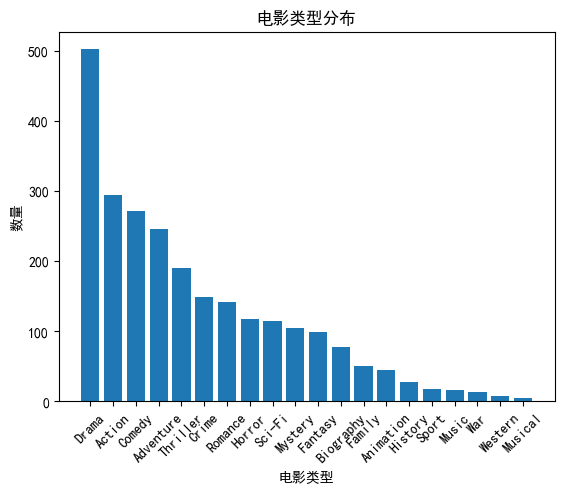

In [633]:
type_counts = df['类型'].str.split(',', expand=True).stack().value_counts()

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示异常的问题

plt.bar(type_counts.index, type_counts.values)
plt.xlabel('电影类型')
plt.ylabel('数量')
plt.title('电影类型分布')
plt.xticks(rotation=45)  # 旋转x坐标标签
plt.show()

统计导演和演员人数，并获取前三名

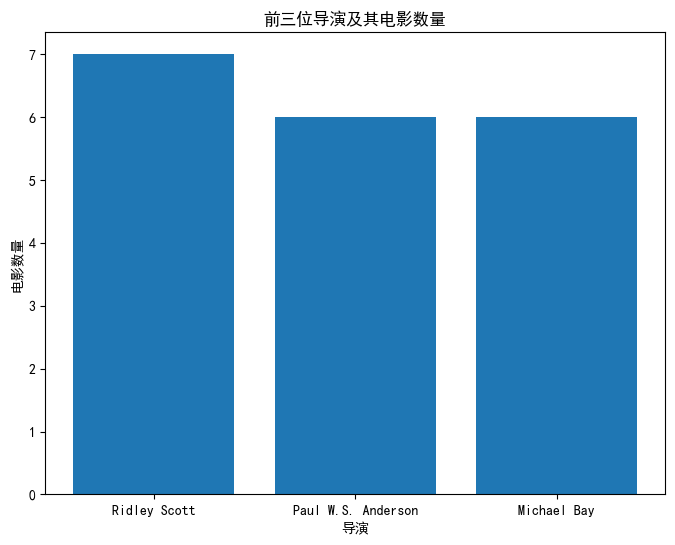

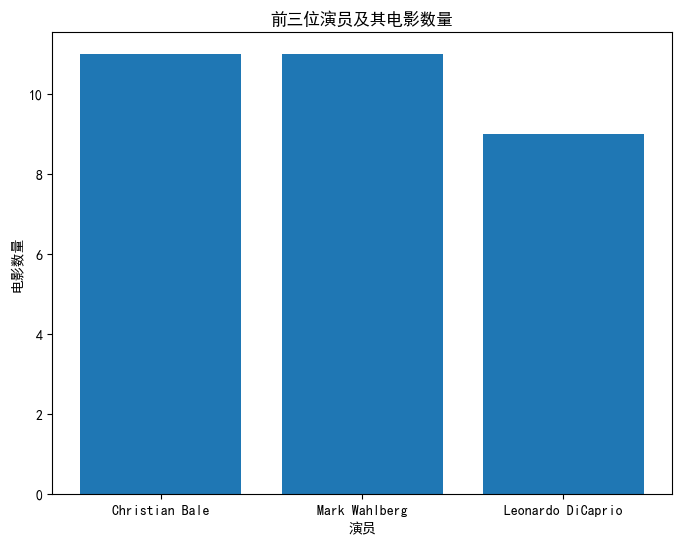

导演人数： 626
演员人数： 2345
前三位导演：
Ridley Scott          7
Paul W.S. Anderson    6
Michael Bay           6
Name: count, dtype: int64
前三位演员：
Christian Bale       11
Mark Wahlberg        11
Leonardo DiCaprio     9
Name: count, dtype: int64


In [634]:
directors = set()
actors = set()

for directors_str, actors_str in zip(df['导演'], df['主演']):
    directors.update(directors_str.split(','))
    actors.update(actors_str.split(','))

directors_count = len(directors)
actors_count = len(actors)

top_directors = df['导演'].str.split(',', expand=True).stack().value_counts().head(3)
top_actors = df['主演'].str.split(',', expand=True).stack().value_counts().head(3)

# 绘制导演人数和前三位导演的柱状图
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_directors)), top_directors.values)
plt.xlabel('导演')
plt.ylabel('电影数量')
plt.title('前三位导演及其电影数量')
plt.xticks(range(len(top_directors)), top_directors.index)
plt.show()

# 绘制演员人数和前三位演员的柱状图
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_actors)), top_actors.values)
plt.xlabel('演员')
plt.ylabel('电影数量')
plt.title('前三位演员及其电影数量')
plt.xticks(range(len(top_actors)), top_actors.index)
plt.show()


print("导演人数：", directors_count)
print("演员人数：", actors_count)
print("前三位导演：")
print(top_directors)
print("前三位演员：")
print(top_actors)

对 '时长'、'票房' 进行分组，探究不同票房不同时长对评分的影响

In [635]:
df['时长'] = df['时长'].str.replace('min','').astype('float')

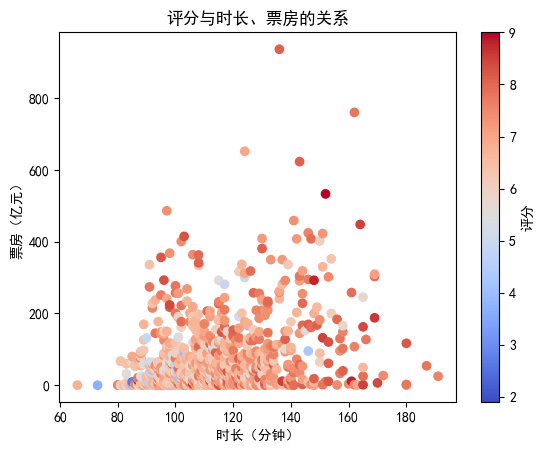

In [636]:
# 对时长和票房进行分组

df['评分'] = pd.to_numeric(df['评分'], errors='coerce')

grouped = df.groupby(['时长', '票房'])['评分'].mean().reset_index()
# grouped
# 绘制散点图
plt.scatter(grouped['时长'], grouped['票房'], c=grouped['评分'], cmap='coolwarm')
plt.colorbar(label='评分')
plt.xlabel('时长（分钟）')
plt.ylabel('票房（亿元）')
plt.title('评分与时长、票房的关系')
plt.show()